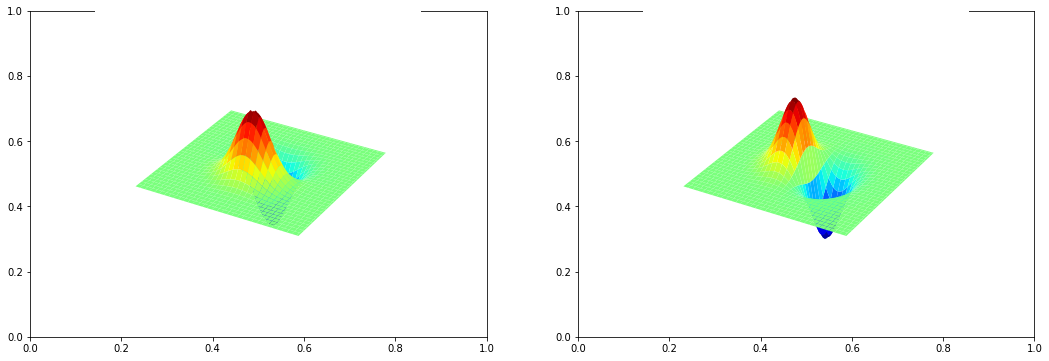

In [47]:
%matplotlib inline

#Question 01
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots( 1, 2, figsize = (18, 6))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')

delta  = 0.1
XX, YY = np.meshgrid(np.arange(-5, 5 + delta, delta), np.arange(-5, 5 + delta, delta) )

sigma = 1
g = np.exp(-(XX**2 + YY**2)/ (2*sigma**2))
g /= np.sum(g)

sobel_v = np.array([[-1, -2, -1],[0, 0, 0], [1, 2, 1]], dtype = np.float32)
g_x = cv.filter2D(g, -1, sobel_v)

sobel_h = np.array([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]], dtype = np.float32)
g_y = cv.filter2D(g, -1, sobel_h)


surf1 = ax1.plot_surface(XX, YY, g_x, cmap = cm.jet, linewidth = 0, antialiased = True)
surf2 = ax2.plot_surface(XX, YY, g_y, cmap = cm.jet, linewidth = 0, antialiased = True)
ax1.axis('off')
ax2.axis('off')
plt.show()

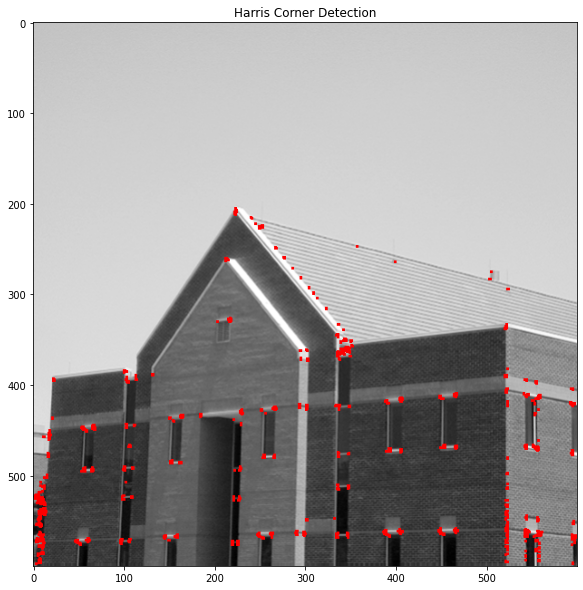

In [52]:
#Question 02

im  = cv.imread(r'building.tif', cv.IMREAD_COLOR)
assert im is not None

corners = im

gray  = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)
im [ dst > 0.01*dst.max()] = [255, 0, 0]


fig, ax= plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(im)
ax.set_title("Harris Corner Detection")

plt.show()



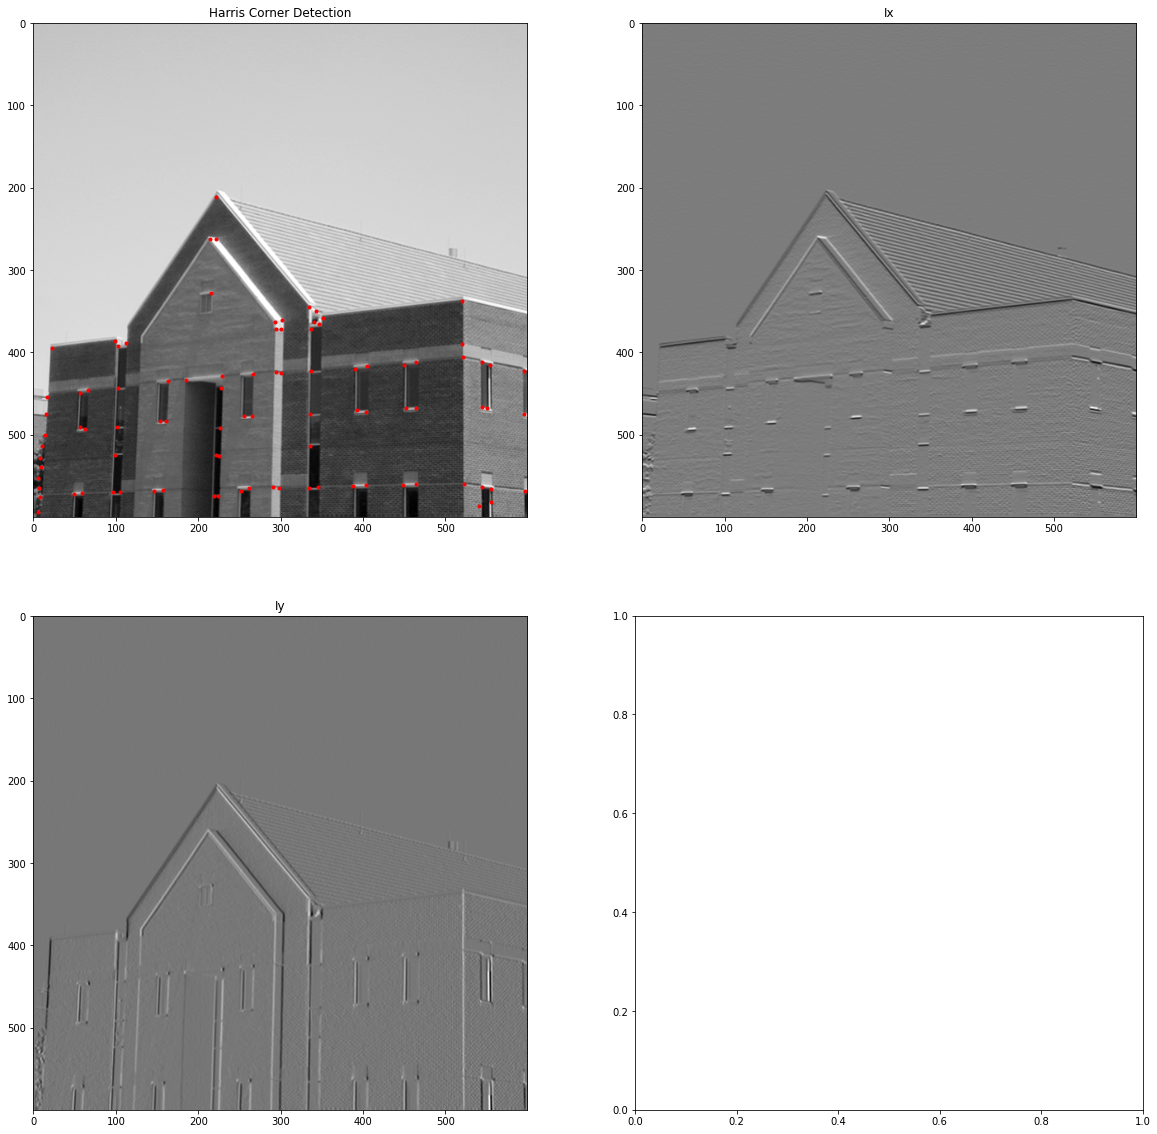

In [50]:
#Question 03
im  = cv.imread(r'building.tif', cv.IMREAD_COLOR)
assert im is not None
from skimage.feature import peak_local_max

I  = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
I  = np.float32(I)

sobel_v = np.array([[-1, -2, -1],[0, 0, 0], [1, 2, 1]], dtype = np.float32)
sobel_h = np.array([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]], dtype = np.float32)

Ix = cv.filter2D(I, -1, sobel_v)
Iy = cv.filter2D(I, -1, sobel_h)

sigma = 3
ksize = 7

m11 = cv.GaussianBlur(Ix*Ix, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize, ksize), sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04

R = det - alpha*trace**2
R[ R < 1e8] = 0
coordinates = peak_local_max(R, min_distance = 2)

fig, ax= plt.subplots(2, 2, figsize = (20, 20))

ax[0, 0].imshow(im, cmap = 'gray')
ax[0, 0].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[0, 0].set_title('Harris Corner Detection')
ax[0, 1].imshow(Ix + 127, cmap = 'gray')
ax[0, 1].set_title('Ix')
ax[1, 0].imshow(Iy + 127, cmap = 'gray')
ax[1, 0].set_title('Iy')
plt.show()



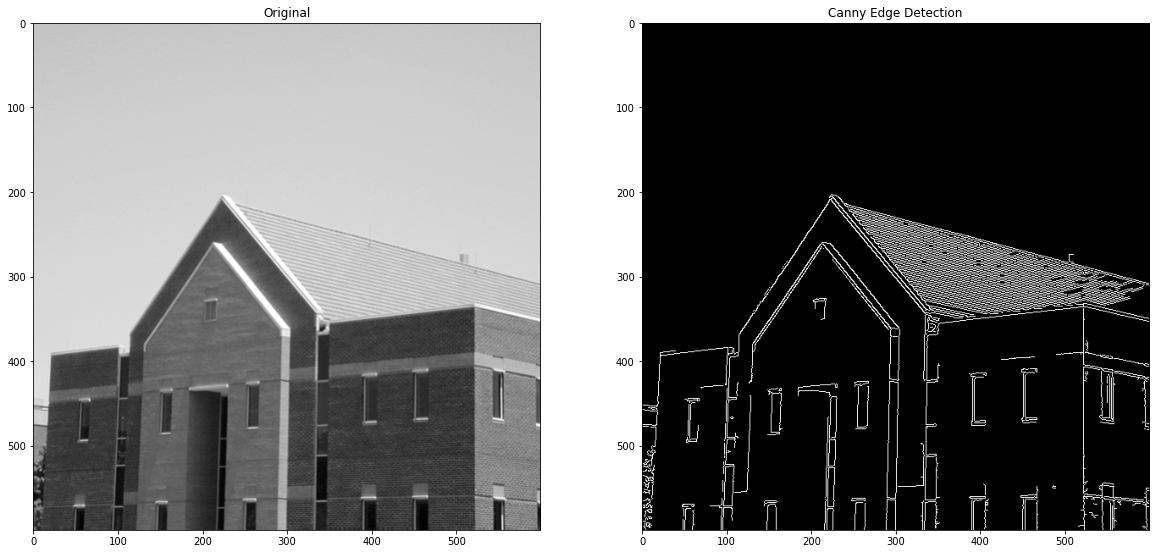

In [51]:
#Question 04
im  = cv.imread(r'building.tif', cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im, 100, 200)

fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax[0].imshow(im, cmap = 'gray')
ax[0].set_title("Original")
ax[1].imshow(edges, cmap = 'gray')
ax[1].set_title("Canny Edge Detection")

plt.show()

